In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('../dataset/wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [18]:
# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

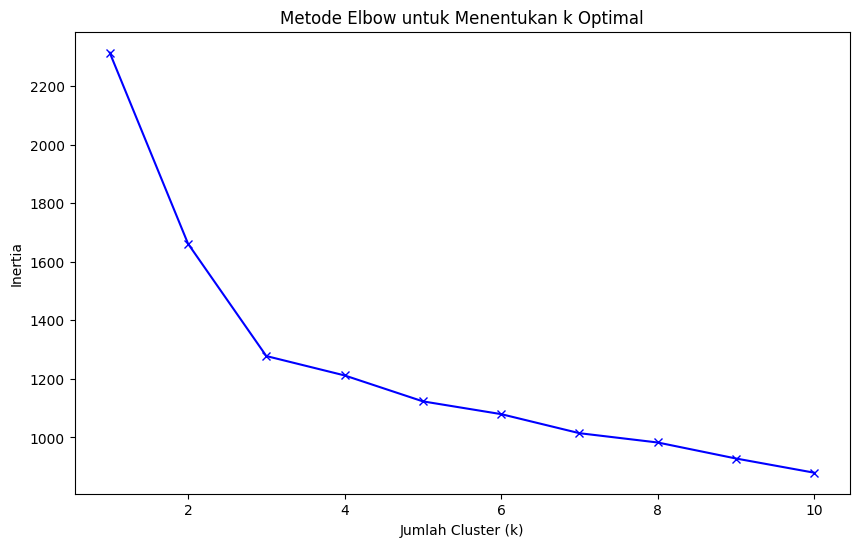

In [19]:
# Menentukan jumlah cluster optimal menggunakan elbow method
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Visualisasi elbow method
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()

In [20]:
# Membuat model K-means dengan jumlah cluster optimal (misalnya k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [21]:
# Menambahkan label cluster ke dataframe
df['Cluster'] = clusters

In [22]:
# Visualisasi hasil clustering menggunakan PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

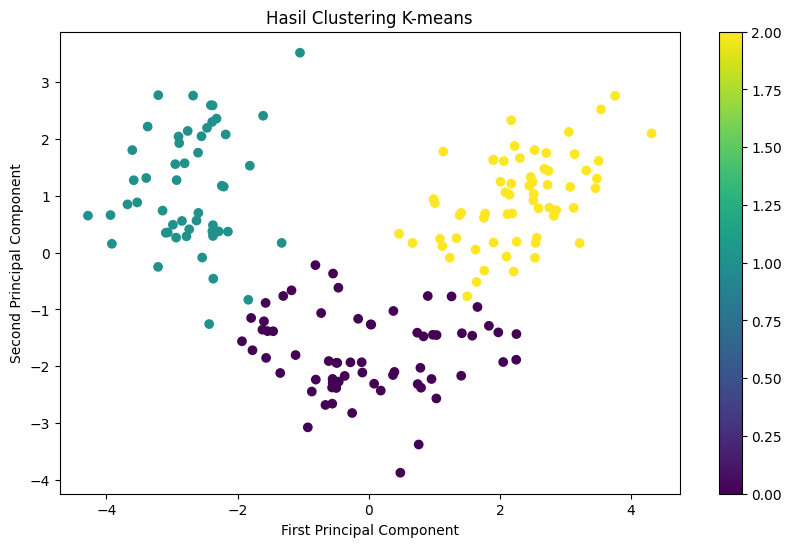

In [23]:
# Plot hasil clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Hasil Clustering K-means')
plt.colorbar(scatter)
plt.show()

In [24]:
# Analisis karakteristik cluster
cluster_means = df.groupby('Cluster').mean()
print("\nRata-rata nilai fitur untuk setiap cluster:")
print(cluster_means)


Rata-rata nilai fitur untuk setiap cluster:
           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster                                                              
0        12.250923    1.897385  2.231231     20.063077   92.738462   
1        13.134118    3.307255  2.417647     21.241176   98.666667   
2        13.676774    1.997903  2.466290     17.462903  107.967742   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         Color_Intensity       Hue     OD280      Proline  
Cluster                                                    
0               2.973077  1.062708  2.803385   510.169231  
1               7.234706  0.691961  1.

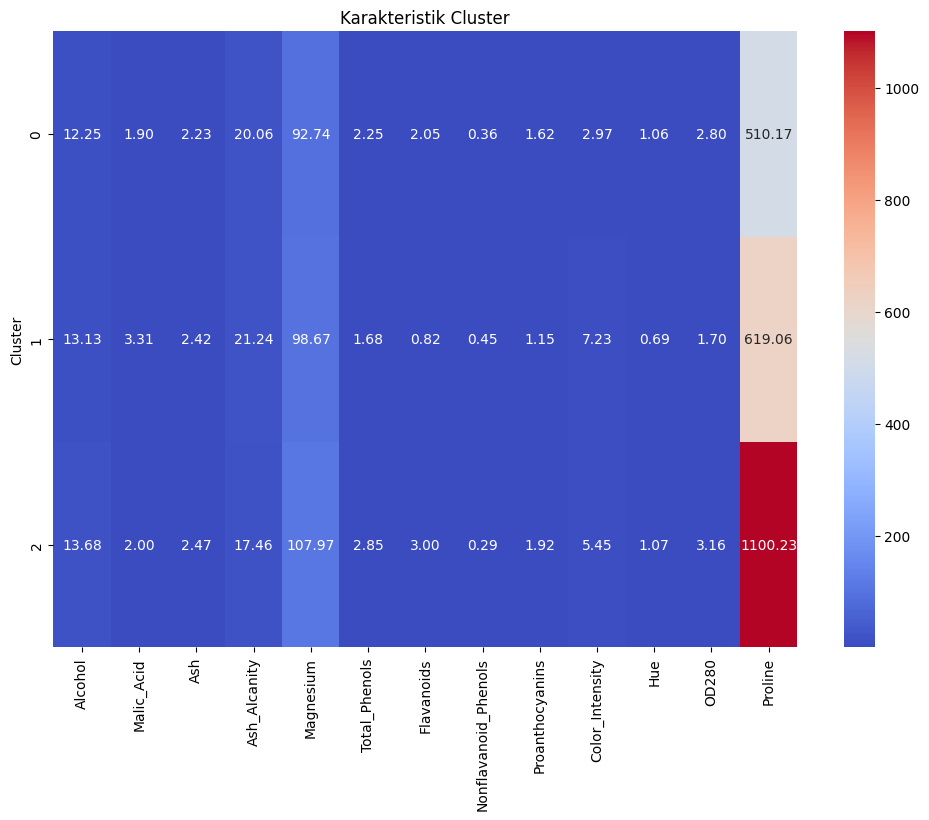

In [25]:
# Visualisasi karakteristik cluster menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Karakteristik Cluster')
plt.show()

In [26]:
# Menambahkan kolom cluster ke dataset asli dan menyimpannya
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = clusters

# Menampilkan beberapa baris pertama dari dataset dengan label cluster
print("\nDataset dengan label cluster:")
print(df_with_clusters.head())

# Menyimpan dataset dengan label cluster ke file CSV (opsional)
df_with_clusters.to_csv('wine_with_clusters.csv', index=False)
print("\nDataset telah disimpan ke 'wine_with_clusters.csv'")



Dataset dengan label cluster:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        2  
1  